In [1]:
from GOESutils.GlobalVars import *
from datetime import datetime, timedelta, timezone
import os, time
from IPython.display import display, Image, clear_output
import numpy as np
import GOESutils.GOESplots as gplt
import GOESutils.GOESimport as gimp
import GOESutils.DataBaseUtils as dbu
import GOESutils.NOAAquery as noaa
import importlib, sys
importlib.reload(sys.modules['GOESutils.GlobalVars'])
from GOESutils.GlobalVars import *
product_list

/home/ubuntu/miniconda3/envs/satimg/lib/python3.12/site-packages/toolbox/cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
/home/ubuntu/miniconda3/envs/satimg/lib/python3.12/site-packages/toolbox/cartopy_tools_OLD.py:241: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools_OLD.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("xmap")


{'ABI-L2-ACHAF': 'Cloud Top Height',
 'ABI-L2-ACHTF': 'Cloud Top Temperature',
 'ABI-L2-ACMF': 'Clear Sky  Mask',
 'ABI-L2-LSTF': 'Land Surface Temperature'}

# Products in a time range

In [ ]:
# importlib.reload(sys.modules['GOESutils.GOESimport'])
# import GOESutils.GOESimport as gimp
startdate = datetime(2020,1,1,tzinfo=utcm5)
enddate = datetime(2020,2,1,tzinfo=utcm5)
prodFileList = gimp.GOESfiles("timerange", startdate, enddate, freq=timedelta(minutes=30),
                              target_product="RadF", bands=14,
                              to_display=True, download=False)

In [ ]:
initial_time = datetime.now(utcm5)
product = prodFileList['product'][0]
for f in list(prodFileList['file']): # Reading each file downloaded
    print("Working with file: {}".format(os.path.basename(f)))                
    FullFileName = os.path.join(destination_path,f)
    data, ProductParams = gimp.ImportingData(FullFileName, product)
    data = gimp.CleaningData(data, product)
    dataset = gplt.export_as(data, ProductParams["DataAttrs"], 
                        filename=ProductParams["DataAttrs"]['dataset_name'],
                        path="./GOESimages/Data")
    

    # Check if it's time to clear the output
    CurrentTime = datetime.now(utcm5)
    minute, seconds = CurrentTime.minute, CurrentTime.second
    elapsed_time = CurrentTime - initial_time
    if elapsed_time >= timedelta(minutes=1):
        # Clear the output
        clear_output(wait=True)
        # Reset the start time
        initial_time = datetime.now(utcm5)
        
print("All the files have been processed.")

In [ ]:
initial_time = datetime.now(utcm5)
for product in products:
    for f in list(prodFileList['file']): # Reading each file downloaded
        print("Working with file: {}".format(os.path.basename(f)))                
        FullFileName = os.path.join(destination_path,f)
        data, ProductParams = gimp.ImportingData(FullFileName, product)
        data = gimp.CleaningData(data, product)
        FullImageName = os.path.join(ProductParams["ImagePath"],"Peru",ProductParams["ImageName"])
        if os.path.exists(FullImageName): # If png image exists, it is shown
            print("Image '{}' already exists in '{}'".format(ProductParams["ImageName"],ProductParams["ImagePath"]))
            display(Image(filename=FullImageName, width=640))
        else: # Creating png image
            file_datetime = ProductParams["ImageTime"].astimezone(utc)
            gFileList = goes_nearesttime(file_datetime.replace(tzinfo=None), product="ABI-L2-MCMIPF", return_as="filelist", download=True, save_dir=destination_path)
            try:
                RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,gFileList.iloc[0]["file"]))
            except:
                gFileList = goes_nearesttime(file_datetime.replace(tzinfo=None), product="ABI-L2-MCMIPF", return_as="filelist", download=True, save_dir=destination_path, overwrite=True)
                RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,gFileList.iloc[0]["file"]))
            figGeo, axGeo = gplt.GeoColorPlot(RGBdata, GeoColorParams, toSave=False, toDisplay=False, toUpload=False, dpi=300)
            if (not os.path.exists(ProductParams["ImagePath"])):
                print(f"Directory for product {product} does not exist. Creating new one...") 
                os.makedirs(ProductParams["ImagePath"])
            print(f"Image for file {os.path.basename(f)} not found, creating one...")
            figProd = gplt.ProductPlot(data, product, axGeo, ProductParams, toSave=True, toDisplay=True, toUpload=False, dpi=600)

        # Check if it's time to clear the output
        CurrentTime = datetime.now(utcm5)
        minute, seconds = CurrentTime.minute, CurrentTime.second
        elapsed_time = CurrentTime - initial_time
        if elapsed_time >= timedelta(minutes=1):
            # Clear the output
            clear_output(wait=True)
            # Reset the start time
            initial_time = datetime.now(utcm5)
            
    print("All the files have been processed.")

In [ ]:
importlib.reload(sys.modules['GOESutils.GOESplots'])
import GOESutils.GOESplots as gplt
ImagesPath = ".\GOESimages\Products\ACHA\Peru"
ImagesInfo = gplt.GettingImagesInfo(ImagesPath, start_date=startdate, end_date=enddate)
gplt.GOESvideos(ImagesInfo, VideoPath=".\GOESimages\Products\ACHA", extension=".avi")

# Products in real time

Current time is: 2023-12-04 20:23:14 -05


2023-12-05 01:23:14 [scrapy.utils.log] INFO: Scrapy 2.11.0 started (bot: scrapybot)
2023-12-05 01:23:14 [scrapy.utils.log] INFO: Versions: lxml 4.9.3.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 22.10.0, Python 3.12.0 | packaged by conda-forge | (main, Oct  3 2023, 08:43:22) [GCC 12.3.0], pyOpenSSL 23.3.0 (OpenSSL 3.1.4 24 Oct 2023), cryptography 41.0.5, Platform Linux-5.15.0-1050-aws-x86_64-with-glibc2.31
2023-12-05 01:23:14 [scrapy.utils.log] INFO: Scrapy 2.11.0 started (bot: scrapybot)
2023-12-05 01:23:14 [scrapy.utils.log] INFO: Versions: lxml 4.9.3.0, libxml2 2.10.3, cssselect 1.2.0, parsel 1.8.1, w3lib 2.1.2, Twisted 22.10.0, Python 3.12.0 | packaged by conda-forge | (main, Oct  3 2023, 08:43:22) [GCC 12.3.0], pyOpenSSL 23.3.0 (OpenSSL 3.1.4 24 Oct 2023), cryptography 41.0.5, Platform Linux-5.15.0-1050-aws-x86_64-with-glibc2.31


Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...


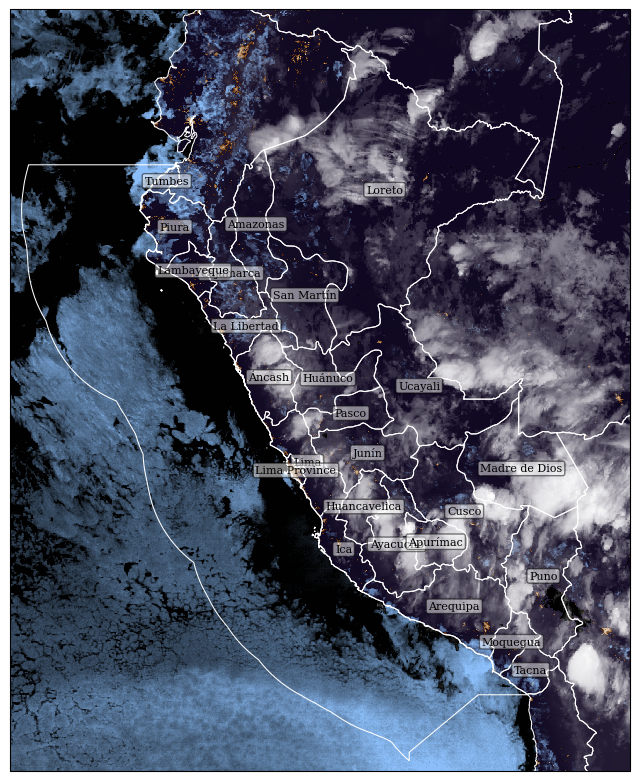

Searching for products: ABI-L2-ACHAF, ABI-L2-ACHTF, ABI-L2-ACMF, ABI-L2-LSTF (Press 'esc' to stop)
Looking for product ABI-L2-LSTF, set of files from date 05-Dec-2023 01:00  
Total Size: 52.49 MB


file  \
0  noaa-goes16/ABI-L2-ACHAF/2023/339/01/OR_ABI-L2...   
1  noaa-goes16/ABI-L2-ACHTF/2023/339/01/OR_ABI-L2...   
2  noaa-goes16/ABI-L2-ACMF/2023/339/01/OR_ABI-L2-...   
3  noaa-goes16/ABI-L2-LSTF/2023/339/01/OR_ABI-L2-...   

                      start                       end  \
0 2023-12-04 20:10:20-05:00 2023-12-04 20:19:51-05:00   
1 2023-12-04 20:00:20-05:00 2023-12-04 20:09:51-05:00   
2 2023-12-04 20:10:20-05:00 2023-12-04 20:19:51-05:00   
3 2023-12-04 20:00:20-05:00 2023-12-04 20:09:51-05:00   

                   creation       product  band      size  
0 2023-12-04 20:23:13-05:00  ABI-L2-ACHAF  None   1.50 MB  
1 2023-12-04 20:13:19-05:00  ABI-L2-ACHTF  None  27.83 MB  
2 2023-12-04 20:20:39-05:00   ABI-L2-ACMF  None  22.55 MB  
3 2023-12-04 20:10:53-05:00   ABI-L2-LSTF  None   0.61 MB

Working with file: OR_ABI-L2-ACHAF-M6_G16_s20233390110205_e20233390119513_c20233390123135.nc
Image for file OR_ABI-L2-ACHAF-M6_G16_s20233390110205_e20233390119513_c20233390123135.nc not found, creating one...
Image G16_ACHA_2023_12_04_20_19.png saved in '../GOESimages/Products/ACHA/Peru'


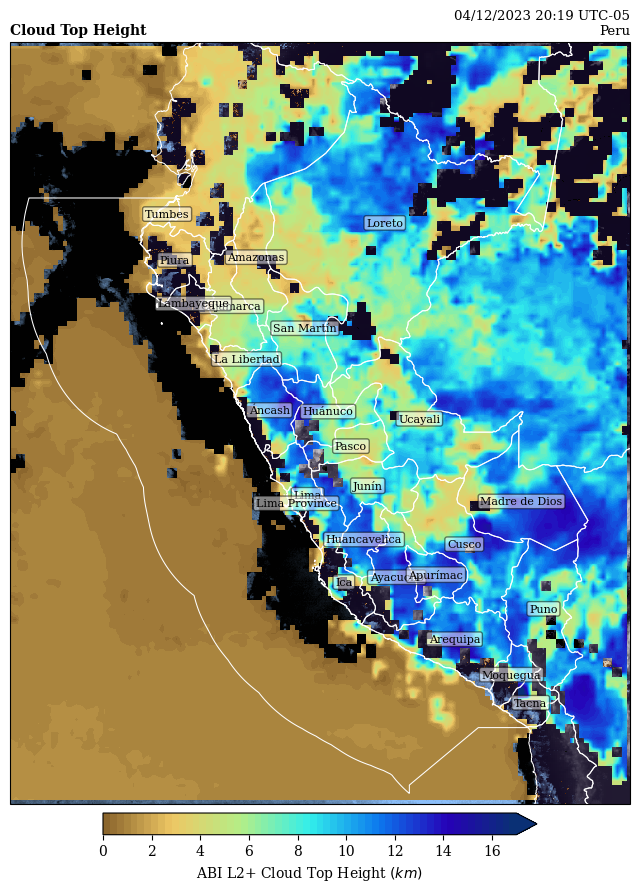

Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHA_2023_12_04_20_19_Amazonas.png saved in '../GOESimages/Products/ACHA/Amazonas'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHA_2023_12_04_20_19_Ancash.png saved in '../GOESimages/Products/ACHA/Ancash'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHA_2023_12_04_20_19_Apurímac.png saved in '../GOESimages/Products/ACHA/Apurímac'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHA_2023_12_04_20_19_Arequipa.png saved in '../GOESimages/Products/ACHA/Arequipa'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHA_2023_12_04_20_19_Ayacucho.png saved in '../GOESimages/Products/ACHA/Ayacucho'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting 

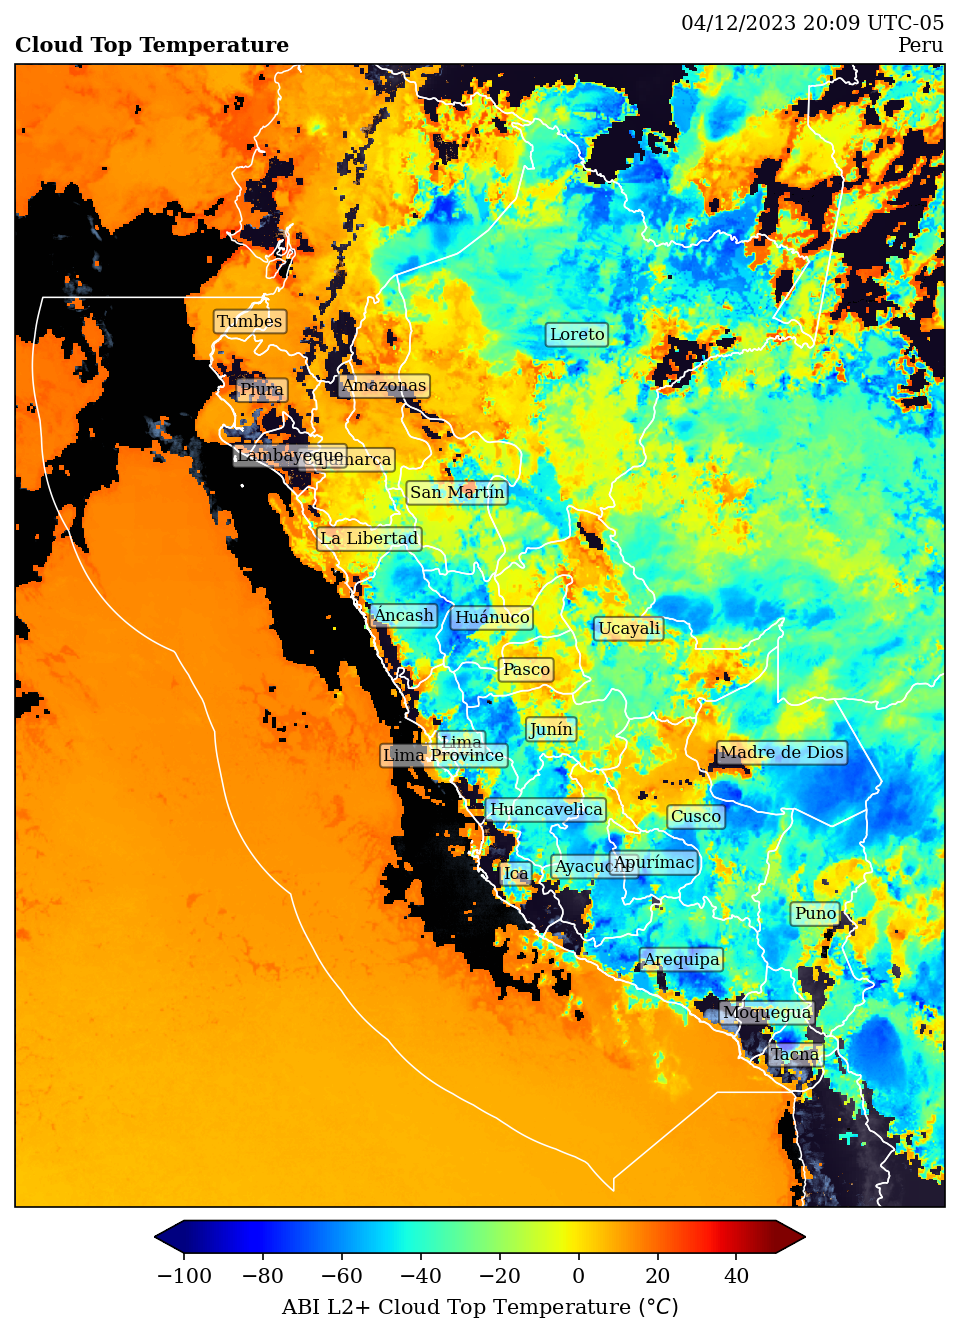

Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHT_2023_12_04_20_09_Amazonas.png saved in '../GOESimages/Products/ACHT/Amazonas'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHT_2023_12_04_20_09_Ancash.png saved in '../GOESimages/Products/ACHT/Ancash'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHT_2023_12_04_20_09_Apurímac.png saved in '../GOESimages/Products/ACHT/Apurímac'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHT_2023_12_04_20_09_Arequipa.png saved in '../GOESimages/Products/ACHT/Arequipa'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting TrueColor image...
Image G16_ACHT_2023_12_04_20_09_Ayacucho.png saved in '../GOESimages/Products/ACHT/Ayacucho'
Plotting geocolor image at 2023-12-05 01:00:00.
It is nighttime! Plotting 

In [2]:
# importlib.reload(sys.modules['GOESutils.GOESimport'])
# import GOESutils.GOESimport as gimp
# importlib.reload(sys.modules['GOESutils.GOESplots'])
# import GOESutils.GOESplots as gplt

toUpload = False
while True:
    clear_output(wait=True)
    CurrentTime = datetime.now(utcm5)
    CurrentTime_str = CurrentTime.strftime('%Y-%m-%d %H:%M:%S %Z')
    print("============================================================")
    print("Current time is: {}".format(CurrentTime_str))
    # gFileList = gimp.GOESfiles("latest", target_product="ABI-L2-MCMIP", download=True)
    # f = gFileList.iloc[0]
    # RGBdata, GeoColorParams = gimp.GeoColorData(os.path.join(destination_path,f["file"]))
    RGBdata = noaa.GeoColorTif()
    figGeo, axGeo = gplt.GeoColorPlot(RGBdata, toSave=True, toDisplay=True, toUpload=False, dpi=150)
    prodFileList = gimp.GOESfiles("latest", target_product=products, to_display=True, download=True, overwrite=True)
    for product in products:
        f = prodFileList[prodFileList["product"]==product].iloc[0]
        FullFileName = os.path.join(destination_path,f["file"])
        data, ProductParams = gimp.ImportingData(FullFileName, product)
        data = gimp.CleaningData(data, product)
        data_re = gimp.interpolate_products(data, product, n=5)
                                                    
        print("Working with file: {}".format(os.path.basename(f['file'])))                
        FullImageName = os.path.join(ProductParams["ImagePath"],"Peru",ProductParams["ImageName"])
        if os.path.exists(FullImageName): # If png image exists, it is shown
            print("Image [{}] already exists in [{}]".format(ProductParams["ImageName"],ProductParams["ImagePath"]))
            display(Image(filename=FullImageName)) # , width=540   
        else: # Creating png image
            if not os.path.exists(ProductParams["ImagePath"]):
                print(f"Directory for product {product} does not exist. Creating new one...") 
                os.makedirs(ProductParams["ImagePath"])
            print(f"Image for file {os.path.basename(f['file'])} not found, creating one...")
            figProd = gplt.ProductPlot(data_re, product, axGeo, ProductParams, toSave=True, toDisplay=True, toUpload=toUpload, dpi=150)

        # # try: # Deleting downloaded product
        # #     os.remove(FullFileName)
        # #     print(f"File '{FullFileName}' has been removed.")
        # # except FileNotFoundError:
        # #     print(f"File '{FullFileName}' not found.")
        # # except Exception as e:
        # #     print(f"An error occurred while deleting the file: {e}")
            
        for dep in gplt.departments:
            gplt.DepartmentPlot(product, dep, RGBdata, data_re, ProductParams, toSave=True, toDisplay=False, toUpload=toUpload)
        reports = gplt.ReportingEvents(data, product, level="L3", send_comments=toUpload)
            
        print("All the files have been processed.")
        

    try: # Check if it's time to clear the output
        CurrentTime = datetime.now(utcm5)
        hour, minute, seconds = CurrentTime.hour, CurrentTime.minute, CurrentTime.second
        if (hour==23 and minute>55): # (elapsed_time >= timedelta(hours=3)) or 
            print("Cleaning database")
            for i in range(2,9):
                folder = f"Images/Type{i}"
                dbu.DeleteFile(folder)
                for d in gplt.departments_folder:
                    folder = f"Images/T{i}{d}"
                    dbu.DeleteFile(folder)
            
        total_remaining_seconds = (5 - (int(minute) % 5)) * 60 - int(seconds)
        remaining_minutes = total_remaining_seconds // 60
        print("Waiting {} minutes for the next file upload".format(remaining_minutes + 2))
        time.sleep((remaining_minutes+2)*60)
    except Exception as e:
        print("Elapsed time attempting failed.")